/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


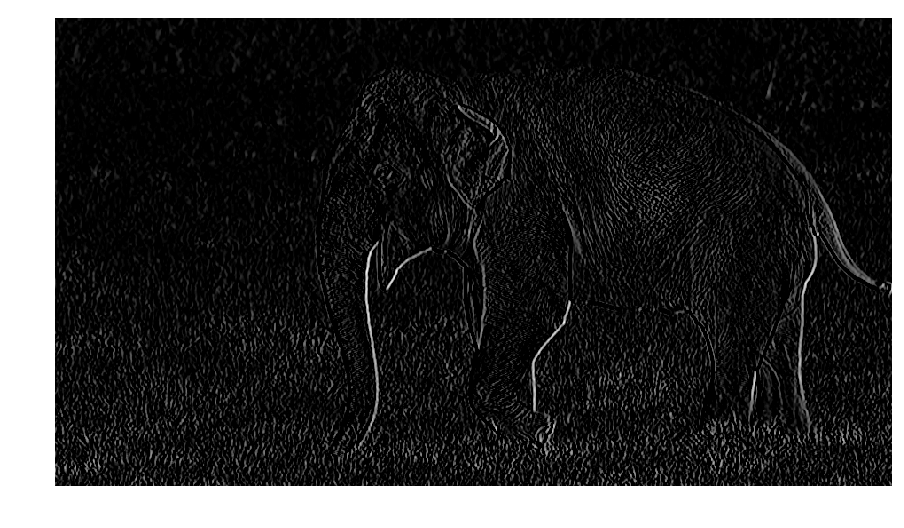

In [0]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from skimage import io, color
from skimage import exposure

from matplotlib.pyplot import figure
figure(num=None, figsize=(9, 15), dpi=120, facecolor='w', edgecolor='k')

img = io.imread('https://mondrian.mashable.com/uploads%252Fcard%252Fimage%252F887009%252F49d251da-d190-49d8-80ad-5f12221574b4.jpg%252F950x534__filters%253Aquality%252880%2529.jpg?signature=kgnqs9P47PJJetZVmw6IxI96WmE=&source=https%3A%2F%2Fblueprint-api-production.s3.amazonaws.com')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
# apply sharpen filter to the original image
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')

# TODO: Change to horizontal edges
edge_kernel = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])

edges = scipy.signal.convolve2d(image_sharpen, edge_kernel, 'valid')


# apply blur filter to the edge detection filtered image
blur_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0;
denoised = scipy.signal.convolve2d(edges, blur_kernel, 'valid')

# Adjust the contrast of the filtered image by applying Histogram Equalization
denoised_equalized = exposure.equalize_adapthist(denoised/np.max(np.abs(denoised)), clip_limit=0.01)
plt.imshow(denoised_equalized, cmap=plt.cm.gray)    # plot the denoised_clipped
plt.axis('off')
plt.show()